<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color.:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Abuzer Yakaryilmaz and Maksim Dimitrijev<br>
        Özlem Salehi | December 4, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font> Controlled Operators</h2>

<a id="task1"></a>
<h3>Task 1</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply Hadamard to both qubits.
    <li> Apply CNOT(qreg[1] is the control,qreg[0] is the target).
    <li> Apply Hadamard to both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit implements CNOT(qreg[0] is the control, qreg[1] is the target).

<h3> Solution </h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg1 =  QuantumRegister(2) # quantum register with 2 qubits
    creg1 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit1.x(qreg1[1]) # set the state of the qubit to |1>
    if input[1]=='1':
        mycircuit1.x(qreg1[0]) # set the state of the qubit to |1>

    # apply h-gate to both qubits
    mycircuit1.h(qreg1[0])
    mycircuit1.h(qreg1[1])

    # apply cx
    mycircuit1.cx(qreg1[1],qreg1[0])

    # apply h-gate to both qubits
    mycircuit1.h(qreg1[0])
    mycircuit1.h(qreg1[1])

    # measure both qubits
    mycircuit1.measure(qreg1,creg1)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit1)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a id="task2"></a>
<h3>Task 2</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply CNOT(qreg[1] is the control, qreg[0] is the target).
    <li> Apply CNOT(qreg[0] is the control, qreg[1] is the target).
    <li> Apply CNOT(qreg[0] is the control, qreg[1] is the target).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the two qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

<h3> Solution </h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg2 =  QuantumRegister(2) # quantum register with 2 qubits
    creg2 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit2.x(qreg2[1]) # set the value of the qubit to |1>
    if input[1]=='1':
        mycircuit2.x(qreg2[0]) # set the value of the qubit to |1>

    # apply cx(qreg2[0] is the target)
    mycircuit2.cx(qreg2[1],qreg2[0])
    # apply cx(qreg2[1] is the target)
    mycircuit2.cx(qreg2[0],qreg2[1])
    # apply cx(qreg2[0] is the target)
    mycircuit2.cx(qreg2[1],qreg2[0])
    
    mycircuit2.measure(qreg2,creg2)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit2)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a id="task3"></a>
<h3> Task 3 [Extra]</h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

<h3> Solution </h3>

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

n = 5
m = 4

states_of_qubits = [] # we trace the state of each qubit also by ourselves

qreg3 =  QuantumRegister(n) # quantum register with n qubits
creg3 =  ClassicalRegister(n) # classical register with n bits

mycircuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers

# set each qubit to |1>
for i in range(n):
    mycircuit3.x(qreg3[i]) # apply x-gate (NOT operator)
    states_of_qubits.append(1) # the state of each qubit is set to 1
    
# randomly pick m pairs of qubits
for i in range(m):
    controller_qubit = randrange(n)
    target_qubit = randrange(n)
    # controller and target qubits should be different
    while controller_qubit == target_qubit: # if they are the same, we pick the target_qubit again
        target_qubit = randrange(n)
    # print our picked qubits
    print("the indices of the controller and target qubits are",controller_qubit,target_qubit)
    # apply cx-gate (CNOT operator)
    mycircuit3.cx(qreg3[controller_qubit],qreg3[target_qubit])
    # we also trace the results
    if states_of_qubits[controller_qubit] == 1: # if the value of the controller qubit is 1,
        states_of_qubits[target_qubit] = 1 - states_of_qubits[target_qubit] # then flips the value of the target qubit 
        # remark that 1-x gives the negation of x
    

# measure the quantum register
mycircuit3.measure(qreg3,creg3)

print("Everything looks fine, let's continue ...")

the indices of the controller and target qubits are 2 3
the indices of the controller and target qubits are 3 0
the indices of the controller and target qubits are 3 4
the indices of the controller and target qubits are 1 0
Everything looks fine, let's continue ...


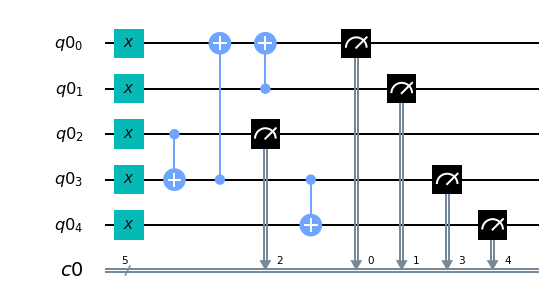

In [2]:
# draw the circuit

mycircuit3.draw(output='mpl')
# re-execute this cell if you DO NOT see the circuit diagram

<a id="task4"></a>
<h3> Task 4 </h3>

In this task, our aim is to create an operator which will apply the NOT operator to the target qubit qreg[0] when the control qubit qreg[1] is in state $\ket{0}$. In other words, we want to obtain the following operator:

$\mymatrix{cccc}{0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1}$.

We can summarize its effect as follows:
<ul>
    <li>$  \ket{00} \rightarrow \ket{01} $, </li>
    <li>$  \ket{01} \rightarrow \ket{00} $, </li>
    <li>$  \ket{10} \rightarrow \ket{10} $, </li>
    <li>$  \ket{11} \rightarrow \ket{11} $. </li>
</ul>

Write a function named c0x which takes the circuit name and the register as parameters to implement the operator and check using the code given below.
<ul>
    <li>Apply NOT operator to qreg[1];</li>
    <li>Apply CNOT operator, where qreg[1] is control and qreg[0] is target;</li>
    <li>Apply NOT operator to qreg[1] - to revert it to the initial state.</li>
</ul>

<b>Idea:</b> We can use our regular CNOT operator, and to change the condition for the control qubit we can apply NOT operator to it before the CNOT - this way the NOT operator will be applied to the target qubit when initially the state of the control qubit was $\ket{0}$.

Although this trick is quite simple, this approach is important and will be very useful in our following implementations.

<h3>Solution:</h3>

In [3]:
def c0x(mycircuit,qreg):

    mycircuit.x(qreg[1])

    # Apply CNOT where qreg[0] is the target
    mycircuit.cx(qreg[1],qreg[0])

    # Returning control qubit to the initial state
    mycircuit.x(qreg[1])

  0.0  1.0  0.0  0.0
  1.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  1.0


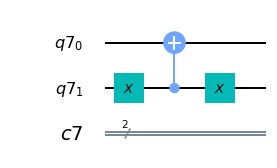

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg4 =  QuantumRegister(2)
creg4 = ClassicalRegister(2)

mycircuit4 = QuantumCircuit(qreg4,creg4)

#We apply the operator c0x by calling the function
c0x(mycircuit4,qreg4)

job = execute(mycircuit4,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit4,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit4.draw(output="mpl")

<a id="task5"></a>
<h3>Task 5</h3>

You have a circuit with three qubits. Apply NOT operator to qreg[1] if qreg[0] is in state 0 and qreg[2] is in state 1. Check its efffect on different inputs.

<h3>Solution</h3>

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['000','001','010','011','100','101','110','111']

for input in all_inputs:
    qreg5 =  QuantumRegister(3) # quantum register with 3 qubits
    creg5 = ClassicalRegister(3) # classical register with 3 bits
    mycircuit5 = QuantumCircuit(qreg5,creg5) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit5.x(qreg5[2]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit5.x(qreg5[1]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit5.x(qreg5[0]) # set the state of the third qubit to |1>

    mycircuit5.x(qreg5[0])

    mycircuit5.ccx(qreg5[2],qreg5[0],qreg5[1])

    #Set back to initial value
    mycircuit5.x(qreg5[0])


# measure the qubits
    mycircuit5.measure(qreg5,creg5)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit5,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit5)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 000 :  000 is observed 100 times
our input is 001 :  001 is observed 100 times
our input is 010 :  010 is observed 100 times
our input is 011 :  011 is observed 100 times
our input is 100 :  110 is observed 100 times
our input is 101 :  101 is observed 100 times
our input is 110 :  100 is observed 100 times
our input is 111 :  111 is observed 100 times


<a id="task6"></a>
<h3> Task 6 </h3>

Implement the NOT operator controlled by 4 qubits where qreg[0] is the target and apply it iteratively to all possible states. Note that you will need additional qubits.

<h3>Solution</h3>

In [ ]:
def ccccx(mycircuit,qreg):
    mycircuit.ccx(qreg[4],qreg[3],qreg[5])
    mycircuit.ccx(qreg[2],qreg[1],qreg[6])

    mycircuit.ccx(qreg[5],qreg[6],qreg[0])

    # Returning additional qubits to the initial state
    mycircuit.ccx(qreg[2],qreg[1],qreg[6])
    mycircuit.ccx(qreg[4],qreg[3],qreg[5])

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


all_inputs=['00000','00001','00010','00011','00100','00101','00110','00111','00000',
            '01001','01010','01011','01100','01101','01110','01111','10000','10001',
            '10010','10011','10100','10101','10110','10111','10000','11001','11010',
            '11011','11100','11101','11110','11111']

for input in all_inputs:
    qreg6 =  QuantumRegister(7) # quantum register with 7 qubits
    creg6 = ClassicalRegister(7) # classical register with 7 bits
    mycircuit6 = QuantumCircuit(qreg6,creg6) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit6.x(qreg6[4]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit6.x(qreg6[3]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit6.x(qreg6[2]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit6.x(qreg6[1]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit6.x(qreg6[0]) # set the state of the fifth qubit to |1>

    ccccx(mycircuit6,qreg6)

    mycircuit6.measure(qreg6,creg6)

    job = execute(mycircuit6,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit6)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a id="task7"></a>
<h3>Task 7</h3>

Implement the following control: the NOT operator is applied to the target qubit qreg[0] if 5 control qubits qreg[5] to qreg[1] are initially in the state $\ket{10101}$. Check your operator by trying different initial states. You may define a function or write your code directly.

<h3>Solution</h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Try different initial states
all_inputs=['101010','101011','100000','111111']

for input in all_inputs:
    qreg7 =  QuantumRegister(9) # quantum register with 9 qubits
    creg7 = ClassicalRegister(9) # classical register with 9 bits
    mycircuit7 = QuantumCircuit(qreg7,creg7) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit7.x(qreg7[5]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit7.x(qreg7[4]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit7.x(qreg7[3]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit7.x(qreg7[2]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit7.x(qreg7[1]) # set the state of the fifth qubit to |1>
    if input[5]=='1':
        mycircuit7.x(qreg7[0]) # set the state of the fifth qubit to |1>

    mycircuit7.x(qreg7[4])
    mycircuit7.x(qreg7[2])

    mycircuit7.ccx(qreg7[1],qreg7[2],qreg7[6])
    mycircuit7.ccx(qreg7[3],qreg7[4],qreg7[7])
    mycircuit7.ccx(qreg7[6],qreg7[7],qreg7[8])

    mycircuit7.ccx(qreg7[5],qreg7[8],qreg7[0])

    # Returning additional and control qubits to the initial state
    mycircuit7.ccx(qreg7[6],qreg7[7],qreg7[8])
    mycircuit7.ccx(qreg7[3],qreg7[4],qreg7[7])
    mycircuit7.ccx(qreg7[1],qreg7[2],qreg7[6])

    mycircuit7.x(qreg7[4])
    mycircuit7.x(qreg7[2])

    mycircuit7.measure(qreg7,creg7)

    job = execute(mycircuit7,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit7)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a id="task8"></a>
<h3>Task 8 (Optional)</h3>

Implement the parametrized controlled NOT operator with 4 control qubits, where parameter will be the state of control qubits for which NOT operator will be applied to the target qubit.

As a result you need to define the following function: <i>control(circuit,quantum_reg,number)</i>, where:
<ul>
    <li><i>circuit</i> allows to pass the quantum circuit;</li>
    <li><i>quantum_reg</i> allows to pass the quantum register;</li>
    <li><i>state</i> is the state of control qubits, between 0 and 15, where 0 corresponds to 0000 and 15 corresponds to 1111 (like binary numbers :) ).</li>
</ul>

<h3>Solution</h3>

In [ ]:
#state - the state of control qubits, between 0 and 15.
def control(circuit,quantum_reg,state):
    if(state%2 == 0):
        circuit.x(quantum_reg[1])
    if(state%4 < 2):
        circuit.x(quantum_reg[2])
    if(state%8 < 4):
        circuit.x(quantum_reg[3])
    if(state < 8):
        circuit.x(quantum_reg[4])
    circuit.ccx(quantum_reg[1],quantum_reg[2],quantum_reg[5])
    circuit.ccx(quantum_reg[3],quantum_reg[4],quantum_reg[6])
    circuit.ccx(quantum_reg[5],quantum_reg[6],quantum_reg[0])
    circuit.ccx(quantum_reg[3],quantum_reg[4],quantum_reg[6])
    circuit.ccx(quantum_reg[1],quantum_reg[2],quantum_reg[5])
    if(state < 8):
        circuit.x(quantum_reg[4])
    if(state%8 < 4):
        circuit.x(quantum_reg[3])
    if(state%4 < 2):
        circuit.x(quantum_reg[2])
    if(state%2 == 0):
        circuit.x(quantum_reg[1])

You can try different inputs to see that your function is implementing the mentioned control operation.

In [ ]:
#Try different initial states
all_inputs=['01010','01011','10000','11111']

for input in all_inputs:
    qreg8 =  QuantumRegister(7) # quantum register with 7 qubits
    creg8 = ClassicalRegister(7) # classical register with 7 bits
    mycircuit8 = QuantumCircuit(qreg8,creg8) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit8.x(qreg8[4]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit8.x(qreg8[3]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit8.x(qreg8[2]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit8.x(qreg8[1]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit8.x(qreg8[0]) # set the state of the fifth qubit to |1>


    control(mycircuit8,qreg8,5)
    mycircuit8.measure(qreg8,creg8)

    job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit8)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")